In [1]:
#K-MEANS CLUSTERING To indentify
#https://www.scikit-yb.org/en/latest/api/cluster/elbow.html
#https://www.analyticsvidhya.com/blog/2021/01/in-depth-intuition-of-k-means-clustering-algorithm-in-machine-learning/

In [24]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import folium

In [25]:
df_1 = pd.read_csv('bc_rest_open.csv')

In [26]:
rests = df_1[['business_id', 'latitude', 'longitude', 'name', 'stars', 'city']]

In [27]:
new_rest = rests[['latitude', 'longitude']]

In [28]:
X = np.array(new_rest.loc[:,['latitude','longitude']])    \
                        .reshape(-1, 2)

In [29]:
number_of_occurences = pd.DataFrame(rests['stars'].value_counts())
number_of_occurences.reset_index(inplace=True)
number_of_occurences.columns = ['stars', 'Count']
number_of_occurences.head()

,stars,Count
0,3.5,1336
1,4.0,1265
2,3.0,881
3,4.5,486
4,2.5,422


In [30]:
number_of_occurences = number_of_occurences.merge(rests.drop_duplicates())

number_of_occurences = number_of_occurences.merge(new_rest)

number_of_occurences.head()

,stars,Count,business_id,latitude,longitude,name,city
0,3.5,1336,D4JtQNTI4X3KcbzacDJsMw,49.251342,-123.101333,Bob Likes Thai Food,Vancouver
1,3.5,1336,AaNj_9KNy9t1H1cu1NCNLQ,49.310091,-123.041686,Mumbai Masala Restaurant,North Vancouver
2,3.5,1336,XqaO85CV9Km7m_aQ3iIpRA,49.166831,-123.137747,Cactus Club Cafe,Richmond
3,3.5,1336,tcreyfoiR2NFMuEz0UClrg,49.289052,-123.139457,The Roost,Vancouver
4,3.5,1336,TDT5DiZ9preK1ad0AFLlDw,49.262321,-123.089898,Klasik Inasal & Noodle Express,Vancouver


In [31]:
distortions = []

K = range(1, 20)
for k in K:
    kmean = KMeans(n_clusters=k, random_state=0, n_init=50, max_iter=500)
    kmean.fit(new_rest)
    distortions.append(kmean.inertia_)

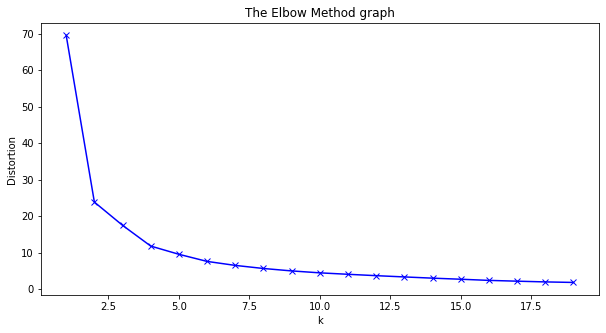

In [32]:
plt.figure(figsize=(10, 5))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method graph')
plt.show()

In [33]:
# running kmeans clustering
kmeans = KMeans(n_clusters=4, random_state=0).fit(new_rest)

new_rest['cluster'] = kmeans.labels_
new_rest.head()

/var/folders/5d/yhcn6m7d2pn9ytcsv1j2890w0000gn/T/ipykernel_26537/3894668778.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rest['cluster'] = kmeans.labels_


,latitude,longitude,cluster
0,49.251342,-123.101333,0
1,49.254436,-123.020050,3
2,49.173723,-122.889641,1
3,49.219532,-123.040893,3
4,49.283532,-123.117107,0


In [34]:
kmeans = KMeans(
    n_clusters=10,  # Setting the amt of clusters
    init='k-means++',  # Initialization kmeans
    max_iter=300,  # Maximum iterations
    n_init=10,  # algorithm will run with different centroid
    random_state=0)  # random state for reproducibility

pred_y = kmeans.fit_predict(X)

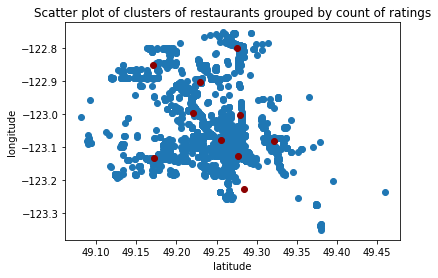

In [50]:
plt.scatter(X[:, 0], X[:, 1])

plt.scatter(kmeans.cluster_centers_[:, 0],
            kmeans.cluster_centers_[:, 1],
            c='Darkred')  # Set centroid color to darkred

plt.xlabel('latitude')
plt.ylabel('longitude')

plt.title(
    'Scatter plot of clusters of restaurants grouped by count of ratings')
plt.show()